The database has been downloaded from Physionet:
https://physionet.org/content/mitdb/1.0.0/

### Data description
* 48 half-hour excerpts
* two-channel ambulatory ECG recordings
* 47 subjects
    * 23 recordings were chosen at random from a set of 4000 inpatient and outpatient recordings
    * 25 were selected to include rare but cliniclly relevant arrhythmias
* frequency 360Hz, 11bit resolution, 10mV range
* Normal QRS complexes are usually prominent in the upper signal. Hence will work with modified limb lead II (MLII)
* 109,000 beat labels

Code		Description
1. N		Normal beat (displayed as "·" by the PhysioBank ATM, LightWAVE, pschart, and psfd)
2. L		Left bundle branch block beat
3. R		Right bundle branch block beat
4. B		Bundle branch block beat (unspecified)
5. A		Atrial premature beat
6. a		Aberrated atrial premature beat
7. J		Nodal (junctional) premature beat
8. S		Supraventricular premature or ectopic beat (atrial or nodal)
9. V		Premature ventricular contraction
10. r		R-on-T premature ventricular contraction
11. F		Fusion of ventricular and normal beat
12. e		Atrial escape beat
13. j		Nodal (junctional) escape beat
14. n		Supraventricular escape beat (atrial or nodal)
15. E		Ventricular escape beat
16. /		Paced beat
17. f		Fusion of paced and normal beat
18. Q		Unclassifiable beat
19. ?		Beat not classified during learning

Non-beat annotations:
Code		Description
1. [		Start of ventricular flutter/fibrillation
2. !		Ventricular flutter wave
3. ]		End of ventricular flutter/fibrillation
4. x		Non-conducted P-wave (blocked APC)
5. (		Waveform onset
6. )		Waveform end
y. p		Peak of P-wave
8. t		Peak of T-wave
9. u		Peak of U-wave
10. `		PQ junction
11. '		J-point
12. ^		(Non-captured) pacemaker artifact
13. |		Isolated QRS-like artifact
14. ~		Change in signal quality
15. +		Rhythm change
16. s		ST segment change
17. T		T-wave change
18. *		Systole
19. D		Diastole
20. =		Measurement annotation
21. "		Comment annotation
22. @		Link to external data

In [1]:
# install Python package for reading waveforms
!pip install wfdb

     |████████████████████████████████| 94 kB 2.9 MB/s eta 0:00:011
     |████████████████████████████████| 154 kB 29.9 MB/s eta 0:00:01
  Using cached numpy-1.18.1-cp37-cp37m-macosx_10_9_x86_64.whl (15.1 MB)
  Using cached matplotlib-3.1.3-cp37-cp37m-macosx_10_9_x86_64.whl (13.2 MB)
     |████████████████████████████████| 58 kB 4.5 MB/s eta 0:00:01
  Using cached pandas-1.0.1-cp37-cp37m-macosx_10_9_x86_64.whl (9.8 MB)
  Using cached scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl (28.4 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (113 kB)
  Using cached pyparsing-2.4.6-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 58 kB 11.6 MB/s eta 0:00:01
  Using cached certifi-2019.11.28-py2.py3-none-any.whl (156 kB)
  Using cached urllib3-1.25.8-py2.py3-n

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import os
import wfdb

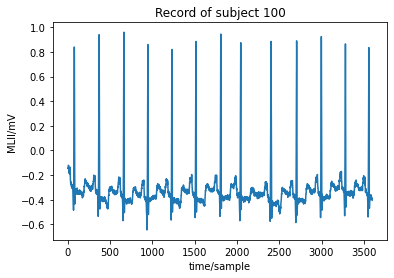

In [2]:
path = '../../mit-bih-arrhythmia-database-1.0.0/'
# Plot the MLII record for subject 100, use record function of Wfdb
record_100 = wfdb.rdrecord(path+'100', channels=[0], sampfrom=0, sampto=3600, physical=True) 
wfdb.plot_wfdb(record=record_100, title='Record of subject 100') 


In [3]:
# can get the signal as numpy array and display relevant metadata with the rdsamp function
signals_100, fields_100 = wfdb.rdsamp(path+'100', channels=[0], sampfrom=0, sampto=3600)
print(signals_100.shape)
display(fields_100)

(3600, 1)


{'fs': 360,
 'sig_len': 3600,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['MLII'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

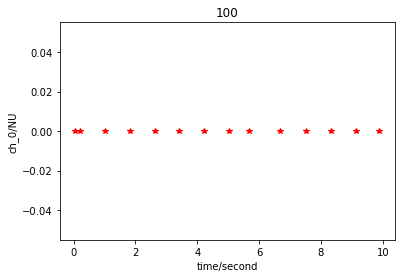

In [4]:
# plot annotation with rdann function, need to specify 'atr' extension
annotation_100 = wfdb.rdann(path+'100', 'atr', sampfrom=0, sampto=3600, return_label_elements=['symbol'],\
                        summarize_labels=True)
wfdb.plot_wfdb(annotation=annotation_100, time_units='seconds')

In [5]:
# get annotation symbols
annot_symbols_100 = annotation_100.symbol
annot_symbols_100

['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N']

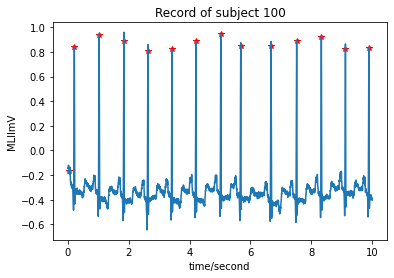

In [6]:
# plot signal and annotation
wfdb.plot_wfdb(record=record_100, title='Record of subject 100', annotation=annotation_100, time_units='seconds') 

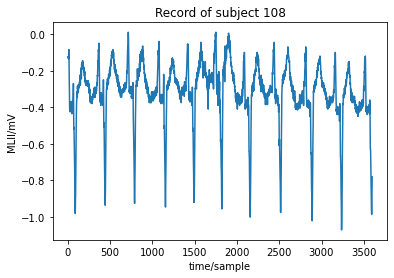

In [7]:
# Plot the MLII record for subject 108
record_108 = wfdb.rdrecord(path+'108', channels=[0], sampfrom=0, sampto=3600, physical=True) 
wfdb.plot_wfdb(record=record_108, title='Record of subject 108') 

In [8]:
# can get the signal as numpy array and display relevant metadata with the rdsamp function
signals_108, fields_108 = wfdb.rdsamp(path+'108', channels=[0], sampfrom=0, sampto=3600)
print(signals_108.shape)
display(fields_108)

(3600, 1)


{'fs': 360,
 'sig_len': 3600,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['MLII'],
 'comments': ['87 F 1227 654 x1',
  'Digoxin, Quinaglute',
  'There is borderline first degree AV block and sinus arrhythmia.  The',
  'PVCs are multiform.  The lower channel exhibits considerable noise and',
  'baseline shifts.']}

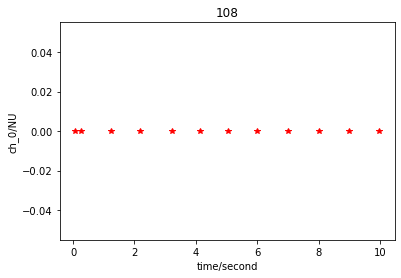

In [9]:
# plot annotation with rdann function, need to specify 'atr' extension
annotation_108 = wfdb.rdann(path+'108', 'atr', sampfrom=0, sampto=3600, return_label_elements=['symbol'],\
                        summarize_labels=True)
wfdb.plot_wfdb(annotation=annotation_108, time_units='seconds')

In [10]:
# get annotation symbols
annot_symbols_108 = annotation_108.symbol
annot_symbols_108

['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']

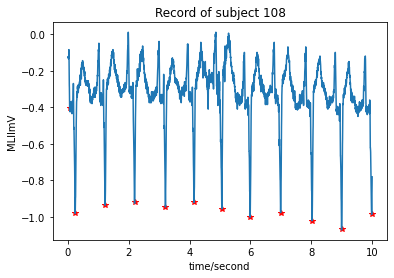

In [11]:
# plot signal and annotation
wfdb.plot_wfdb(record=record_108, title='Record of subject 108', annotation=annotation_108, time_units='seconds') 

In [12]:
def pull_signal_4abs_plotting(record, samples):
    signals, fields = wfdb.rdsamp(path+record, channels=[0], sampfrom=0, sampto=samples)
    annotation = wfdb.rdann(path+record, 'atr', sampfrom=0, sampto=samples, return_label_elements=['symbol'],\
                        summarize_labels=True)
    annot_symbols = annotation.symbol
    annot_x_coord = annotation.sample.tolist()
    annot_x_coord = [x/360 for x in annot_x_coord]
    return signals, annot_symbols, annot_x_coord

In [13]:
signals_100, annot_symbols_100, annot_x_coord_100 = pull_signal_4abs_plotting('100', 1800)
signals_108, annot_symbols_108, annot_x_coord_108 = pull_signal_4abs_plotting('108', 1800)
signals_207, annot_symbols_207, annot_x_coord_207 = pull_signal_4abs_plotting('207', 1800)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


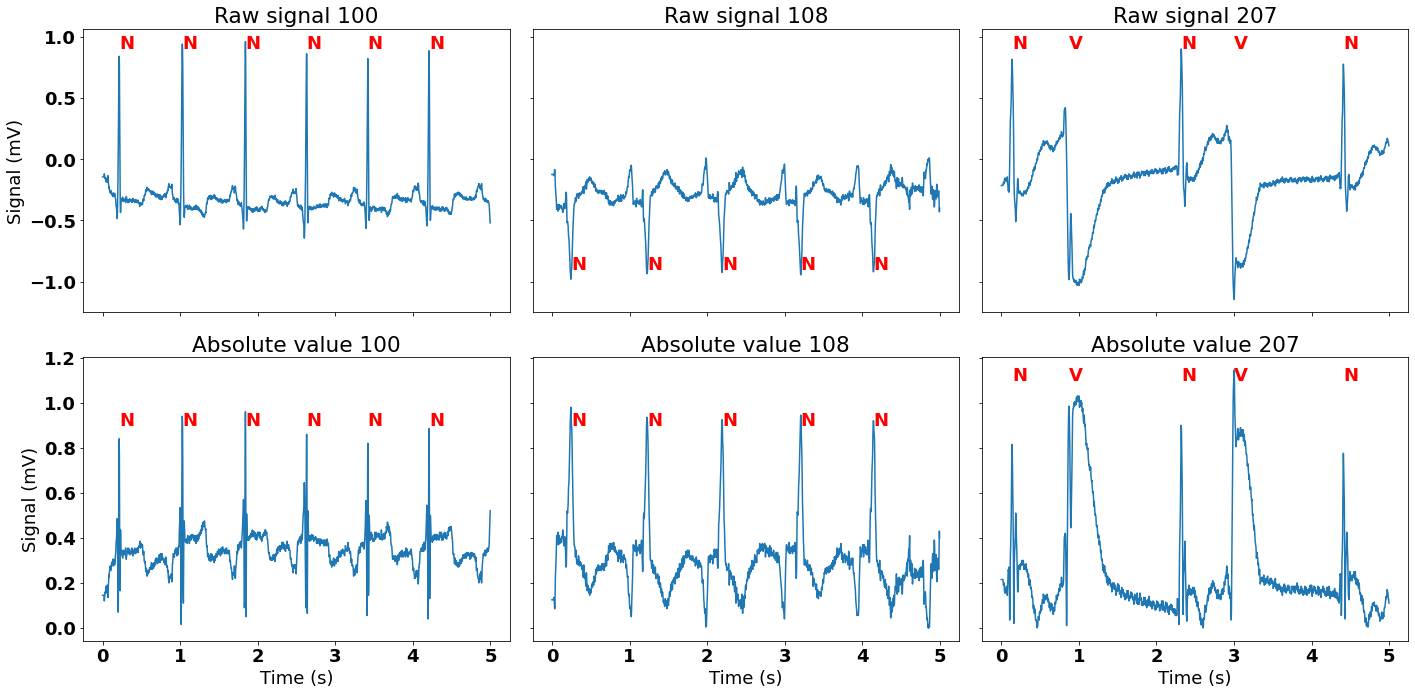

In [14]:
from matplotlib import rc as mrc
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

mrc('font', **font)

# swap Rs with Ns in 207
annot_symbols_207 = [symbol if symbol!='R' else 'N' for symbol in annot_symbols_207]

# put everything together by plotting the ECG and corresponding heartbeat labels
x = list(range(1800))
x = [val/360 for val in x]
fig, ax = plt.subplots(2, 3, figsize = (20,10), sharex='col', sharey='row')
ax[0][0].plot(x, signals_100)
#ax[0][0].set_xlabel('Time (s)')
ax[0][0].set_ylabel('Signal (mV)')
ax[0][0].set_title('Raw signal 100')

ax[1][0].plot(x, np.absolute(signals_100))
ax[1][0].set_xlabel('Time (s)')
ax[1][0].set_ylabel('Signal (mV)')
ax[1][0].set_title('Absolute value 100')

for i, txt in enumerate(annot_symbols_100):
    if i >0:
        ax[0][0].text(annot_x_coord_100[i], 0.9, txt, {'color': 'r'})
        ax[1][0].text(annot_x_coord_100[i], 0.9, txt, {'color': 'r'})
    
ax[0][1].plot(x, signals_108)
#ax[0][1].set_xlabel('Time (s)')
#ax[0][1].set_ylabel('MLII signal (mV)')
ax[0][1].set_title('Raw signal 108')

ax[1][1].plot(x, np.absolute(signals_108))
ax[1][1].set_xlabel('Time (s)')
#ax[1][1].set_ylabel('MLII signal (mV)')
ax[1][1].set_title('Absolute value 108')

for i, txt in enumerate(annot_symbols_108):
    if i>0:
        ax[0][1].text(annot_x_coord_108[i], -0.9, txt, {'color': 'r'})
        ax[1][1].text(annot_x_coord_108[i], 0.9, txt, {'color': 'r'})
    
ax[0][2].plot(x, signals_207)
#ax[0][2].set_xlabel('Time (s)')
#ax[0][2].set_ylabel('MLII signal (mV)')
ax[0][2].set_title('Raw signal 207')

ax[1][2].plot(x, np.absolute(signals_207))
ax[1][2].set_xlabel('Time (s)')
#ax[1][2].set_ylabel('MLII signal (mV)')
ax[1][2].set_title('Absolute value 207')

for i, txt in enumerate(annot_symbols_207):
    if i>0:
        ax[0][2].text(annot_x_coord_207[i], 0.9, txt, {'color': 'r'})
        ax[1][2].text(annot_x_coord_207[i], 1.1, txt, {'color': 'r'})
    
plt.tight_layout()

plt.savefig('../../Images/raw_abs_value100_108_207.png', format='png')
#plt.show()

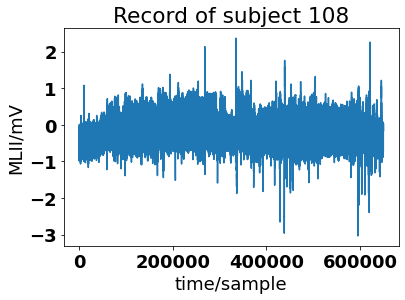

In [15]:
record_108 = wfdb.rdrecord(path+'108', channels=[0], physical=True) 
wfdb.plot_wfdb(record=record_108, title='Record of subject 108') 

In [16]:
# get sample annotation and locations for entire 100 record
annotation_100 = wfdb.rdann(path+'100', 'atr', return_label_elements=['symbol'])
import collections
counter_100=collections.Counter(annotation_100.symbol)

In [17]:
counter_100 # print the count for each symbol

Counter({'+': 1, 'N': 2239, 'A': 33, 'V': 1})

In [18]:
# make a dataframe from the dictionary
import pandas as pd
for key in counter_100.keys():
    counter_100[key] = [counter_100[key]]
df_100 = pd.DataFrame(counter_100)
df_100

,+,N,A,V
0,1,2239,33,1


In [19]:
# make a list of all file names, exclude records 102, 104, 107 and 217 (paced beats)
file_list = list(range(100, 235))
list_to_remove = list(range(125,200))
list_to_remove += [102, 104, 107, 110, 120, 204, 206, 211, 216, 217, 218, 224, 225, 226, 227, 229]
for item in list_to_remove:
    file_list.remove(item)
file_list = [str(item) for item in file_list]
assert len(file_list) == 44

In [20]:
# Let's get annotation counts for all patients
from collections import defaultdict
symbol_count = defaultdict(int)
for file_name in file_list:
    annotation = wfdb.rdann(path+file_name, 'atr', return_label_elements=['symbol'])
    counter = collections.Counter(annotation.symbol)
    for key in counter.keys():
        symbol_count[key]+=counter[key]
symbol_count_df = pd.DataFrame(symbol_count, index=['Count'])
symbol_count_df

,+,N,A,V,~,|,Q,x,F,j,...,a,J,R,[,!,],E,S,"""",e
Count,1173,74546,2546,6903,573,131,15,193,803,229,...,150,83,7259,6,472,6,106,2,437,16


In [21]:
# sort and display label counts in descending order
symbol_count_df = symbol_count_df.T.sort_values(by='Count', ascending=False)
symbol_count_df.reset_index(inplace=True)
symbol_count_df

,index,Count
0,N,74546
1,L,8075
2,R,7259
3,V,6903
4,A,2546
5,+,1173
6,F,803
7,~,573
8,!,472
9,"""",437


In [22]:
# get a list of annotation descriptions
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [23]:
# make a dataframe with descriptions
annot_dict = {'N':                                    'Normal beat',
'L':                  'Left bundle branch block beat',
'R':                 'Right bundle branch block beat',
'a':                'Aberrated atrial premature beat',
'V':              'Premature ventricular contraction',
'F':          'Fusion of ventricular and normal beat',
'J':              'Nodal (junctional) premature beat',
'A':                   'Atrial premature contraction',
'S':     'Premature or ectopic supraventricular beat',
'E':                        'Ventricular escape beat',
'j':                 'Nodal (junctional) escape beat',
'/':                                     'Paced beat',
'Q':                            'Unclassifiable beat',
'~':                          'Signal quality change',
'|':                     'Isolated QRS-like artifact',
's':                                      'ST change',
'T':                                  'T-wave change',
'*':                                        'Systole',
'D':                                       'Diastole',
'"':                             'Comment annotation',
'=':                         'Measurement annotation',
'p':                                    'P-wave peak',
'B':              'Left or right bundle branch block',
'^':                      'Non-conducted pacer spike',
't':                                    'T-wave peak',
'+':                                  'Rhythm change',
'u':                                    'U-wave peak',
'?':                                       'Learning',
'!':                       'Ventricular flutter wave',
'[':      'Start of ventricular flutter/fibrillation',
']':        'End of ventricular flutter/fibrillation',
'e':                             'Atrial escape beat',
'n':                   'Supraventricular escape beat',
'@':  'Link to external data (aux_note contains URL)',
'x':             'Non-conducted P-wave (blocked APB)',
'f':                'Fusion of paced and normal beat',
'(':                                 'Waveform onset',
')':                                   'Waveform end',
'r':       'R-on-T premature ventricular contraction'}

In [24]:
list_of_symbols = symbol_count_df['index'].values.tolist()
list_of_symbols

['N',
 'L',
 'R',
 'V',
 'A',
 '+',
 'F',
 '~',
 '!',
 '"',
 'j',
 'x',
 'a',
 '|',
 'E',
 'J',
 'e',
 'Q',
 '[',
 ']',
 'S']

In [25]:
list_of_descriptions = [annot_dict[symbol] for symbol in list_of_symbols]
list_of_descriptions

['Normal beat',
 'Left bundle branch block beat',
 'Right bundle branch block beat',
 'Premature ventricular contraction',
 'Atrial premature contraction',
 'Rhythm change',
 'Fusion of ventricular and normal beat',
 'Signal quality change',
 'Ventricular flutter wave',
 'Comment annotation',
 'Nodal (junctional) escape beat',
 'Non-conducted P-wave (blocked APB)',
 'Aberrated atrial premature beat',
 'Isolated QRS-like artifact',
 'Ventricular escape beat',
 'Nodal (junctional) premature beat',
 'Atrial escape beat',
 'Unclassifiable beat',
 'Start of ventricular flutter/fibrillation',
 'End of ventricular flutter/fibrillation',
 'Premature or ectopic supraventricular beat']

In [26]:
descriptions = pd.Series(list_of_descriptions)
descriptions

0                                    Normal beat
1                  Left bundle branch block beat
2                 Right bundle branch block beat
3              Premature ventricular contraction
4                   Atrial premature contraction
5                                  Rhythm change
6          Fusion of ventricular and normal beat
7                          Signal quality change
8                       Ventricular flutter wave
9                             Comment annotation
10                Nodal (junctional) escape beat
11            Non-conducted P-wave (blocked APB)
12               Aberrated atrial premature beat
13                    Isolated QRS-like artifact
14                       Ventricular escape beat
15             Nodal (junctional) premature beat
16                            Atrial escape beat
17                           Unclassifiable beat
18     Start of ventricular flutter/fibrillation
19       End of ventricular flutter/fibrillation
20    Premature or e

In [27]:
# add a column with symbol descriptions
symbol_count_df = pd.concat([symbol_count_df, descriptions], axis=1)
symbol_count_df.columns = ['Symbol', 'Count', 'Description']
symbol_count_df

,Symbol,Count,Description
0,N,74546,Normal beat
1,L,8075,Left bundle branch block beat
2,R,7259,Right bundle branch block beat
3,V,6903,Premature ventricular contraction
4,A,2546,Atrial premature contraction
5,+,1173,Rhythm change
6,F,803,Fusion of ventricular and normal beat
7,~,573,Signal quality change
8,!,472,Ventricular flutter wave
9,"""",437,Comment annotation


## We are going to analyze the data the same way as in the Kaggle dataset from Kachuee et al publication, which is 5 class classification. Here are the classes with corresponding label groups:

0. N: N, L, R, e, j (Normal beats)
1. S: A, a, J, S (Supraventricular ectopic beats)
2. V: V, E (Ventricular ectopic beats)
3. F: F (Fusion beats)
4. Q: /, f, Q (Unclassifiable beats)

In [28]:
pd.set_option('mode.chained_assignment', None)
# filter out non beats
non_beat = ['+', '~', '!', '"', 'x', '|', '[', ']']
symbol_count_df = symbol_count_df[~symbol_count_df.Symbol.isin(non_beat)]
# group remaining symbols into 5 classes
symbol_count_df.loc[symbol_count_df.Symbol.isin(['N', 'L', 'R', 'e', 'j']), 'Label'] = 'N'
symbol_count_df.loc[symbol_count_df.Symbol.isin(['A', 'a', 'J', 'S']), 'Label'] = 'S'
symbol_count_df.loc[symbol_count_df.Symbol.isin(['V', 'E']), 'Label'] = 'V'
symbol_count_df.loc[symbol_count_df.Symbol.isin(['F']), 'Label'] = 'F'
symbol_count_df.loc[symbol_count_df.Symbol.isin(['/', 'f', 'Q']), 'Label'] = 'Q'
symbol_count_df

,Symbol,Count,Description,Label
0,N,74546,Normal beat,N
1,L,8075,Left bundle branch block beat,N
2,R,7259,Right bundle branch block beat,N
3,V,6903,Premature ventricular contraction,V
4,A,2546,Atrial premature contraction,S
6,F,803,Fusion of ventricular and normal beat,F
10,j,229,Nodal (junctional) escape beat,N
12,a,150,Aberrated atrial premature beat,S
14,E,106,Ventricular escape beat,V
15,J,83,Nodal (junctional) premature beat,S


In [29]:
# sort class counts in descending order
grouped_df = symbol_count_df.groupby('Label')['Count'].sum()
grouped_df.sort_values(ascending=False)

Label
N    90125
V     7009
S     2781
F      803
Q       15
Name: Count, dtype: int64

In [30]:
def make_data_wannot(file_name):
    signals, fields = wfdb.rdsamp(path+file_name, channels=[0])
    annotation = wfdb.rdann(path+file_name, 'atr', return_label_elements=['symbol'])
    samp_index = annotation.sample.tolist()
    annot_symbol = annotation.symbol
    signal_df = pd.DataFrame({'Signal':np.squeeze(signals)})
    annot_df = pd.DataFrame({'Annotation':annot_symbol}, index=samp_index)
    annotated_signal = signal_df.merge(annot_df, left_index=True, right_index=True, how='left')
    return annotated_signal

In [31]:
annot_100 = make_data_wannot('100')
annot_100.head(20)

,Signal,Annotation
0,-0.145,NaN
1,-0.145,NaN
2,-0.145,NaN
3,-0.145,NaN
4,-0.145,NaN
5,-0.145,NaN
6,-0.145,NaN
7,-0.145,NaN
8,-0.120,NaN
9,-0.135,NaN


In [32]:
# this form of the dataframe is not very useful for analysis, we need 1 beat per row
# based on the plot 1 sec (+/- 0.5 sec on either side of the annotation) should be enough to cover a beat
# make the window size a variable to alter later

non_beat = ['+', '~', '!', '"', 'x', '|', '[', ']']

def make_data_1beat_per_row(file_name, window): # window in sec correspond to 360 points of the signal
    signals, fields = wfdb.rdsamp(path+file_name, channels=[0])
    annotation = wfdb.rdann(path+file_name, 'atr', return_label_elements=['symbol'])
    samp_index = annotation.sample.tolist()
    annot_symbol = annotation.symbol
    step = int(window * 360/2)
    x = np.zeros((len(annot_symbol)-12, 2*step))
    signal_total = np.squeeze(signals).tolist()
    for i in np.arange(6, len(samp_index)-6):
            x[i-6, :] = signal_total[samp_index[i]-step:samp_index[i]+step] 
        # get the signal corresponding to the beat
    labeled_beat_df = pd.DataFrame(x)
    label_column = pd.Series(annot_symbol[6:-6], name='Label')
    labeled_beat_df = pd.concat([labeled_beat_df, label_column], axis=1)

    return labeled_beat_df

In [33]:
df_230 = make_data_1beat_per_row('230', 1)

In [34]:
df_230.tail()

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Label
2449,-0.045,-0.045,-0.050,-0.050,-0.055,-0.060,-0.055,-0.065,-0.060,-0.040,...,0.080,0.080,0.075,0.070,0.065,0.065,0.065,0.065,0.085,N
2450,0.160,0.210,0.235,0.240,0.205,0.150,0.115,0.070,0.060,0.055,...,-0.080,-0.060,-0.050,-0.035,-0.035,-0.045,-0.050,-0.055,-0.070,N
2451,-0.025,-0.020,0.000,0.040,0.050,0.075,0.095,0.100,0.110,0.120,...,0.155,0.165,0.175,0.135,0.065,-0.005,-0.080,-0.145,-0.170,N
2452,-0.525,-0.540,-0.550,-0.540,-0.545,-0.555,-0.540,-0.550,-0.535,-0.505,...,-0.370,-0.345,-0.325,-0.280,-0.250,-0.210,-0.185,-0.175,-0.170,N
2453,0.525,0.530,0.565,0.655,0.805,1.000,1.230,1.500,1.795,2.075,...,0.075,0.055,0.040,0.015,0.005,-0.030,-0.070,-0.090,-0.115,+


In [36]:
# Make a list of non-beats to filter out
non_beat = ['+', '~', '!', '"', 'x', '|', '[', ']']

In [37]:
import pandas as pd
def make_dataset(list_file_names, window): # window in sec correspond to 360 points of the signal
    
    dataset_df = pd.DataFrame() #initialize an empty datafeame
    
    for file_name in list_file_names:
        #print("processing...", file_name)
        signals, fields = wfdb.rdsamp(path+file_name, channels=[0]) # get the signal for upper channel
        annotation = wfdb.rdann(path+file_name, 'atr', return_label_elements=['symbol']) # get annotations
        samp_index = annotation.sample.tolist() # make a list of annotation indices
        annot_symbol = annotation.symbol # make a list of annotation symbols
        step = int(window * 360/2) # calculate the sample size on either side of the beat
        x = np.zeros((len(annot_symbol)-12, 2*step)) # empty array, n_cols = window*360, n_rows = number of annotations
        signal_total = np.squeeze(signals).tolist() # get the one-dimmensional signal as list
        for i in np.arange(6, len(samp_index)-6):
            x[i-6, :] = signal_total[samp_index[i]-step:samp_index[i]+step] 
            # get the signal corresponding to the beat index +/- step
        labeled_beat_df = pd.DataFrame(x) # turn the matrix into a DataFrame
        label_column = pd.Series(annot_symbol[6:-6], name='Label')
        labeled_beat_df = pd.concat([labeled_beat_df, label_column], axis=1) # add beat annotations
        labeled_beat_df = labeled_beat_df[~labeled_beat_df.Label.isin(non_beat)] # filter out non-beat annotations
        
        dataset_df = pd.concat([dataset_df, labeled_beat_df], axis=0, ignore_index=True) # combine with the dataset
    
    # finally filter out all non-beats
    return dataset_df

In [38]:
list_file_names = ['100','101']
window = 1
dataset_df = make_dataset(list_file_names, window)

In [39]:
len(dataset_df)

4116

In [40]:
dataset_df.head()

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Label
0,-0.425,-0.420,-0.405,-0.380,-0.370,-0.365,-0.365,-0.365,-0.345,-0.330,...,-0.310,-0.310,-0.310,-0.330,-0.335,-0.330,-0.320,-0.325,-0.325,N
1,-0.330,-0.330,-0.310,-0.295,-0.285,-0.290,-0.290,-0.310,-0.295,-0.285,...,-0.215,-0.220,-0.245,-0.255,-0.230,-0.205,-0.210,-0.220,-0.230,N
2,-0.385,-0.370,-0.390,-0.375,-0.370,-0.380,-0.390,-0.390,-0.385,-0.375,...,-0.345,-0.355,-0.365,-0.350,-0.360,-0.350,-0.340,-0.345,-0.355,A
3,-0.345,-0.355,-0.370,-0.350,-0.350,-0.350,-0.345,-0.350,-0.355,-0.360,...,-0.345,-0.345,-0.335,-0.345,-0.355,-0.355,-0.355,-0.345,-0.335,N
4,-0.380,-0.355,-0.350,-0.355,-0.350,-0.340,-0.330,-0.325,-0.305,-0.320,...,-0.335,-0.355,-0.340,-0.320,-0.315,-0.330,-0.340,-0.340,-0.350,N


### Making a dataset with multiple files works, now let's see the count of each beat for the entire dataset

In [41]:
pat_symbol_count = {}
for file_name in file_list:
    annotation = wfdb.rdann(path+file_name, 'atr', return_label_elements=['symbol'])
    annotation.symbol = [annotation for annotation in annotation.symbol if annotation not in non_beat]
    counter = collections.Counter(annotation.symbol)
    pat_symbol_count[file_name] = counter

In [42]:
pat_symbol_count

{'100': Counter({'N': 2239, 'A': 33, 'V': 1}),
 '101': Counter({'N': 1860, 'Q': 2, 'A': 3}),
 '103': Counter({'N': 2082, 'A': 2}),
 '105': Counter({'N': 2526, 'V': 41, 'Q': 5}),
 '106': Counter({'N': 1507, 'V': 520}),
 '108': Counter({'N': 1739, 'V': 17, 'F': 2, 'A': 4, 'j': 1}),
 '109': Counter({'L': 2492, 'F': 2, 'V': 38}),
 '111': Counter({'L': 2123, 'V': 1}),
 '112': Counter({'N': 2537, 'A': 2}),
 '113': Counter({'N': 1789, 'a': 6}),
 '114': Counter({'N': 1820, 'V': 43, 'J': 2, 'F': 4, 'A': 10}),
 '115': Counter({'N': 1953}),
 '116': Counter({'N': 2302, 'V': 109, 'A': 1}),
 '117': Counter({'N': 1534, 'A': 1}),
 '118': Counter({'R': 2166, 'V': 16, 'A': 96}),
 '119': Counter({'N': 1543, 'V': 444}),
 '121': Counter({'N': 1861, 'A': 1, 'V': 1}),
 '122': Counter({'N': 2476}),
 '123': Counter({'N': 1515, 'V': 3}),
 '124': Counter({'R': 1531, 'J': 29, 'V': 47, 'F': 5, 'A': 2, 'j': 5}),
 '200': Counter({'V': 826, 'N': 1743, 'A': 30, 'F': 2}),
 '201': Counter({'N': 1625,
          'a': 97,


In [43]:
pat_symbol_count_df = pd.DataFrame(pat_symbol_count)

In [44]:
symbol_per_pat_df = pat_symbol_count_df.T
symbol_per_pat_df

,N,A,V,Q,F,j,L,a,J,R,E,S,e
100,2239.0,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,1860.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2082.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2526.0,NaN,41.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1507.0,NaN,520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,1739.0,4.0,17.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,38.0,NaN,2.0,NaN,2492.0,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,1.0,NaN,NaN,NaN,2123.0,NaN,NaN,NaN,NaN,NaN,NaN
112,2537.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,1789.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN


In [45]:
symbol_per_pat_df['Class_N'] = symbol_per_pat_df[['N','L','R', 'e', 'j']].sum(axis=1)
symbol_per_pat_df['Class_S'] = symbol_per_pat_df[['A', 'a', 'J', 'S']].sum(axis=1) 
symbol_per_pat_df['Class_V'] = symbol_per_pat_df[['V', 'E']].sum(axis=1)
symbol_per_pat_df['Class_F'] = symbol_per_pat_df['F']

In [46]:
symbol_per_pat_df.to_csv('../../Data_processed/record_label_summary.csv')

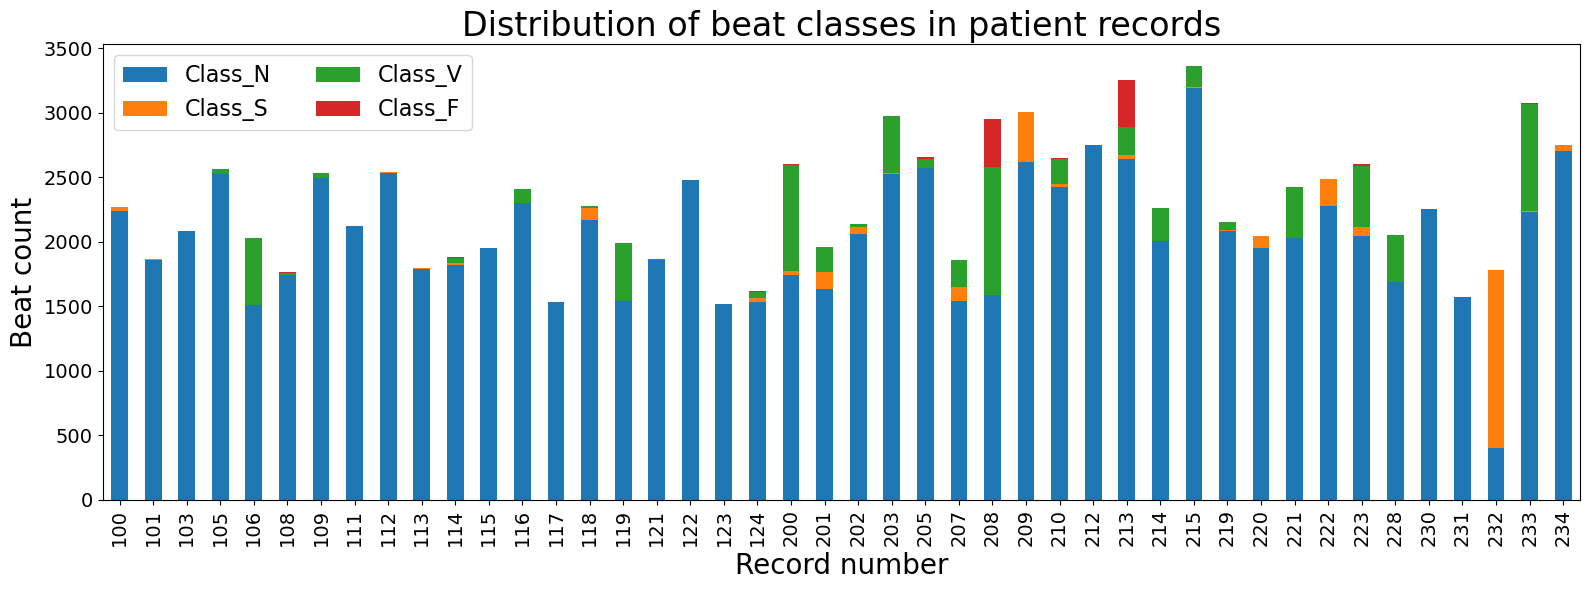

In [73]:
plt.rcParams.update(plt.rcParamsDefault)
symbol_per_pat_df[['Class_N', 'Class_S', 'Class_V', 'Class_F']].plot.bar(figsize=(16,6), stacked=True)
plt.xlabel("Record number", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Beat count", fontsize=20)
#plt.rcParams.update({'axes.titlesize': 'medium'})
plt.title("Distribution of beat classes in patient records", fontsize=24)
plt.legend(loc='upper left', ncol=2, fontsize=16) #bbox_to_anchor=(0.5, 0.05),
plt.tight_layout()
plt.savefig('../../Images/class_distribution.png', format='png')
plt.show()

In [57]:
normal_beat_count = symbol_counts[symbol_counts.index.isin(['N', 'L', 'R', 'e','j'])].sum()
print("Normal beat count ", normal_beat_count)
supra_beat_count = symbol_counts[symbol_counts.index.isin(['A', 'a', 'J', 'S'])].sum()
print("Supraventricular beat count ", supra_beat_count)
vent_beat_count = symbol_counts[symbol_counts.index.isin(['V', 'E'])].sum()
print("Ventricular beat count ", vent_beat_count)
fusion_beat_count = symbol_counts[symbol_counts.index.isin(['F'])].sum()
print("Fusion beat count ", fusion_beat_count)
unclass_beat_count = symbol_counts[symbol_counts.index.isin(['/', 'f', 'Q'])].sum()
print("Unclassifiable beat count ", unclass_beat_count)

Normal beat count  90631.0
Supraventricular beat count  2781.0
Ventricular beat count  7236.0
Fusion beat count  803.0
Unclassifiable beat count  8043.0


In [58]:
total_beat = normal_beat_count+supra_beat_count+vent_beat_count+fusion_beat_count+unclass_beat_count
print("Fraction normal: ", normal_beat_count/total_beat)
print("Fraction supraventricular: ", supra_beat_count/total_beat)
print("Fraction ventricular: ", vent_beat_count/total_beat)
print("Fraction fusion: ", fusion_beat_count/total_beat)
print("Fraction unclassifiable: ", unclass_beat_count/total_beat)

Fraction normal:  0.8277257201307834
Fraction supraventricular:  0.025398651980930463
Fraction ventricular:  0.06608581292125595
Fraction fusion:  0.007333735181836448
Fraction unclassifiable:  0.07345607978519371


## The classes are heavily imbalanced
First edit the make_dataset function to group the labels into 5 categories.

In [70]:
def make_dataset_5class(list_file_names, window): # window in sec correspond to 360 points of the signal
    
    dataset_df = pd.DataFrame() #initialize an empty datafeame
    
    for file_name in list_file_names:
        #print("processing...", file_name)
        signals, fields = wfdb.rdsamp(path+file_name, channels=[0]) # get the signal for upper channel
        annotation = wfdb.rdann(path+file_name, 'atr', return_label_elements=['symbol']) # get annotations
        samp_index = annotation.sample.tolist() # make a list of annotation indices
        annot_symbol = annotation.symbol # make a list of annotation symbols
        step = int(window * 360/2) # calculate the sample size on either side of the beat
        x = np.zeros((len(annot_symbol)-12, 2*step)) # empty array, n_cols = window*360, n_rows = number of annotations
        signal_total = np.squeeze(signals).tolist() # get the one-dimmensional signal as list
        for i in np.arange(6, len(samp_index)-6):
            x[i-6, :] = signal_total[samp_index[i]-step:samp_index[i]+step] 
            # get the signal corresponding to the beat index +/- step
        labeled_beat_df = pd.DataFrame(x) # turn the matrix into a DataFrame
        label_column = pd.Series(annot_symbol[6:-6], name='Label')
        labeled_beat_df = pd.concat([labeled_beat_df, label_column], axis=1) # add beat annotations
        dataset_df = pd.concat([dataset_df, labeled_beat_df], axis=0, ignore_index=True) # combine with the dataset
    
    # generate an additional column for 5 label classes
    dataset_df = dataset_df[~dataset_df.Label.isin(non_beat)]
    dataset_df.loc[dataset_df.Label.isin(['N', 'L', 'R', 'e', 'j']), 'Label_class'] = 'N'
    dataset_df.loc[dataset_df.Label.isin(['A', 'a', 'J', 'S']), 'Label_class'] = 'S'
    dataset_df.loc[dataset_df.Label.isin(['V', 'E']), 'Label_class'] = 'V'
    dataset_df.loc[dataset_df.Label.isin(['F']), 'Label_class'] = 'F'
    dataset_df.loc[dataset_df.Label.isin(['/', 'f', 'Q']), 'Label_class'] = 'Q'
   
    # generate an additional column for numerical output labels
    dataset_df.loc[dataset_df.Label_class=='N', 'Output_label'] = 0
    dataset_df.loc[dataset_df.Label_class=='S', 'Output_label'] = 1
    dataset_df.loc[dataset_df.Label_class=='V', 'Output_label'] = 2
    dataset_df.loc[dataset_df.Label_class=='F', 'Output_label'] = 3
    dataset_df.loc[dataset_df.Label_class=='Q', 'Output_label'] = 4
    
    # filter out any missing values
    dataset_df = dataset_df[~dataset_df['Label'].isna()]
    return dataset_df

In [62]:
import random

# define a function to calculate prevalence
def calc_lab_prev(label_class):
    label_fract = label_class.value_counts()/len(label_class)
    label_fract.sort_index(axis=0, ascending=True, inplace=True)
    return label_fract

def data_splitter(test_num, make_dataset, dif_threshold, num_class):
    """Split the dataset into a desired number train and test (test_num) samples.
    Make_dataset is the function used to compile the dataset from individual signals
    Compute prevalence of the major classes (num_class) in the train-test split.
    Return the file list and train test dataframes if prevalence difference
    is <= to dif_threshold"""
    for i in range(50):
        print("Processing {} loop".format(i))
        test_files = random.sample(file_list, k=test_num)
        train_files = [file for file in file_list if file not in test_files]
        train_df = make_dataset(train_files, 1)
        test_df = make_dataset(test_files, 1)
        train_prev = calc_lab_prev(train_df.Label_class)
        test_prev = calc_lab_prev(test_df.Label_class)
        prev_dif = train_prev-test_prev
        print(prev_dif)
        if sum(abs(prev_dif.values) < dif_threshold) == 5:
            break
    return test_files, train_files, test_df, train_df, prev_dif

## I already have a 50-50 split, now lets do 37.5 test, 62.5 train.

In [74]:
dif_threshold = np.array([0.008, 1, 1, 0.03, 1])
test_files, train_files, test_df, train_df, prev_dif = data_splitter(12, make_dataset_5class, dif_threshold, 5)

Processing 0 loop
F   -0.009098
N    0.109761
Q   -0.104057
S    0.028098
V   -0.024705
Name: Label_class, dtype: float64
Processing 1 loop
F   -0.008931
N    0.159004
Q   -0.189178
S    0.032680
V    0.006426
Name: Label_class, dtype: float64
Processing 2 loop
F    0.008815
N    0.053263
Q   -0.117823
S    0.031976
V    0.023769
Name: Label_class, dtype: float64
Processing 3 loop
F    0.008761
N    0.028448
Q    0.011038
S   -0.002306
V   -0.045940
Name: Label_class, dtype: float64
Processing 4 loop
F   -0.008499
N    0.035016
Q    0.012166
S    0.019739
V   -0.058422
Name: Label_class, dtype: float64
Processing 5 loop
F    0.008877
N   -0.020501
Q   -0.011265
S    0.018841
V    0.004049
Name: Label_class, dtype: float64
Processing 6 loop
F   -0.027162
N    0.051546
Q   -0.004739
S    0.024978
V   -0.044623
Name: Label_class, dtype: float64
Processing 7 loop
F   -0.008183
N    0.073028
Q    0.000647
S   -0.043659
V   -0.021834
Name: Label_class, dtype: float64
Processing 8 loop
F    0

/Users/zhannahakhverdyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


F    0.008113
N    0.162694
Q   -0.099115
S   -0.045852
V   -0.025840
Name: Label_class, dtype: float64
Processing 18 loop
F    0.009667
N    0.139119
Q   -0.197037
S    0.021994
V    0.026257
Name: Label_class, dtype: float64
Processing 19 loop
F    0.008881
N    0.010927
Q   -0.003290
S   -0.047725
V    0.031207
Name: Label_class, dtype: float64
Processing 20 loop
F    0.009198
N    0.053466
Q   -0.085405
S    0.013813
V    0.008929
Name: Label_class, dtype: float64
Processing 21 loop
F   -0.008973
N   -0.076455
Q    0.097444
S    0.032693
V   -0.044709
Name: Label_class, dtype: float64
Processing 22 loop
F    0.009499
N    0.042009
Q   -0.104741
S    0.012463
V    0.040770
Name: Label_class, dtype: float64
Processing 23 loop
F   -0.008756
N    0.019900
Q   -0.006421
S    0.025080
V   -0.029804
Name: Label_class, dtype: float64
Processing 24 loop
F    0.008912
N   -0.050864
Q    0.015414
S    0.018296
V    0.008242
Name: Label_class, dtype: float64
Processing 25 loop
F    0.008976
N 

print(train_files)
print(test_files)

In [69]:
print(train_df.Label_class.value_counts())
print(test_df.Label_class.value_counts())

N    73753
V     5441
Q     3857
S     2511
F      775
Name: Label_class, dtype: int64
N    16441
Q     4142
V     1773
S      253
F       25
Name: Label_class, dtype: int64


In [75]:
train_list = ['100', '101', '102', '103', '104', '106', '109', '111', '112', '113', '122', '124', '210', '213', \
              '214', '215', '217', '219', '221', '223', '228', '232', '233', '234']

test_list = ['121', '123', '222', '108', '207', '200', '118', '209', '208', '230', '114', '119', '115', '205', \
             '231', '116', '203', '107', '117', '202', '212', '201', '105', '220']

train_df = make_dataset_5class(train_list, 1)

test_df = make_dataset_5class(test_list, 1)

In [76]:
train_df.to_csv('../../Data_processed/train_030620_5class.csv')
test_df.to_csv('../../Data_processed/test_030620_5class.csv')

### Note, after some explolarion with data splitting into train and test, I decided to split the dataset like Chazal et al. but with the following modification:
- move 202 to train set, such that both 201 and 202 (records from the same patient) are in the same set
- train = [101, 106, 108, 109, 112, 114, 115, 116, 118,119, 122, 124, 201, 202, 203, 205, 207, 208, 209, 215, 220, 223, 230]
- test = [100, 103, 105, 111, 113, 117, 121, 123, 200, 210, 212, 213, 214, 219, 221, 222, 228, 231, 232, 233, 234]